In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [73]:
# Load titanic data and inspect first 5 rows
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
# Check for any missing data in all columns
missing_values_count = titanic.isnull().sum()
print(missing_values_count[0:11])

# Drop Cabin column
titanic = titanic.drop('Cabin', axis = 1)

# Drop missing rows for Age
titanic = titanic.dropna()

# Inspect
titanic.head(20)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


In [75]:
# Label males as 0 and females as 1
titanic = titanic.replace({'male':0, 'female':1})

In [76]:
# Separate features data and labels
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic['Survived']

In [77]:
# Split the data into a training and testing sets
r = 4
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=r)

# Further split the testing set into testing and final validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, 
                y_test, test_size=0.25, random_state=r)


In [78]:
# Create an upruned tree model
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

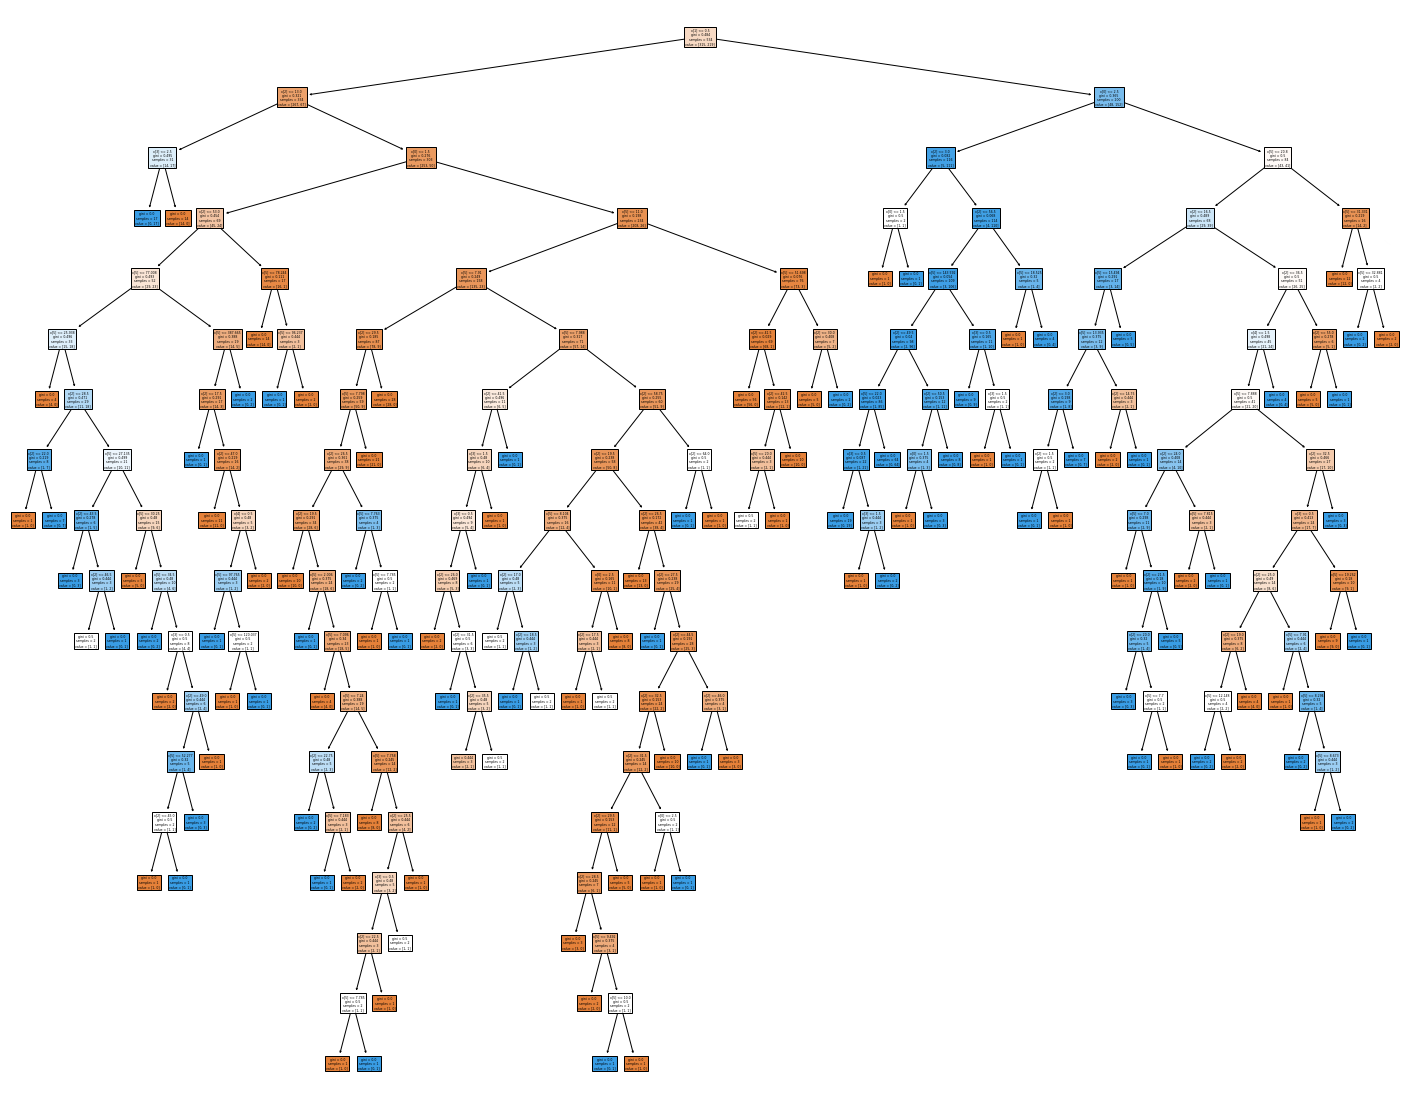

In [79]:
# Plot the unpruned tree
plt.figure(figsize=(25,20))
tree.plot_tree(unpruned, filled=True)
plt.show()

In [80]:
# Print the performace and depth of the unpruned tree
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.8120300751879699
At depth: 17


In [115]:
# Calculate taining and testing accuracy for pruned trees with max depth between 1 and 10
train_accuracies = []
test_accuracies = []
for num in range(2,11):
    tree = DecisionTreeClassifier(max_depth=num, random_state=r)
    tree.fit(X_train, y_train)
    train_accuracy = tree.score(X_train, y_train)
    test_accuracy = tree.score(X_test, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
print(train_accuracies)
print(test_accuracies)
    

[0.7940074906367042, 0.8389513108614233, 0.8426966292134831, 0.8595505617977528, 0.8820224719101124, 0.900749063670412, 0.9250936329588015, 0.9400749063670412, 0.951310861423221]
[0.8270676691729323, 0.8195488721804511, 0.8345864661654135, 0.7969924812030075, 0.7969924812030075, 0.7894736842105263, 0.8421052631578947, 0.7894736842105263, 0.849624060150376]


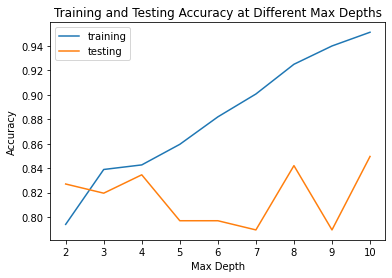

In [116]:
# Plot both training and testing scores in relation to max depth
plt.plot(train_accuracies, label='training')
plt.plot(test_accuracies, label='testing')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8], labels=['2','3','4','5','6','7','8','9','10'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy at Different Max Depths')
plt.show()

Training accuracy score gradually increases as the max depth increases, creating a pretty straight line. This means that at higher depths the tree might become overfitted as it becomes more and more accurate in regards to training data.

Testing score oscillates around 0.8 accuracy mark without an upwards or downwards trends. This creates a flat spiky line. This means the use of different depths between 2-10 creates little difference in the prediction accuracy and the oscillations are coincidental.

Depths 3 and 4 both have similar training and testing scores. The testing score is high while the training score has not gone overly up.

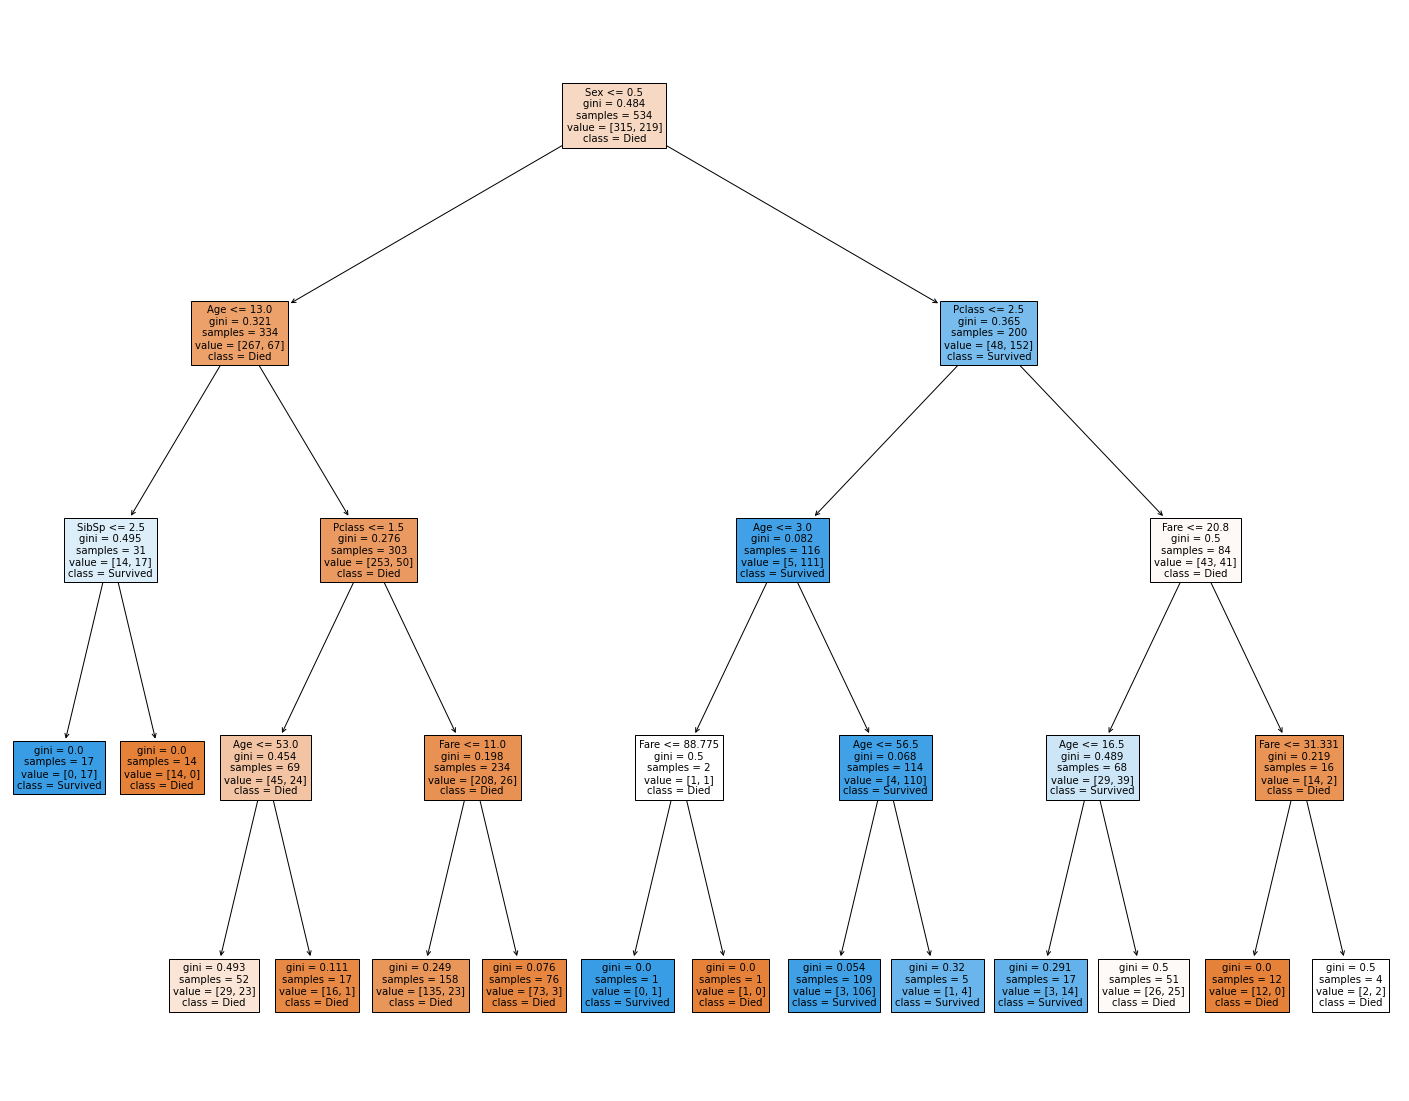

Final performance on validation data: 0.8345864661654135


In [91]:
# Create a final tree with a depth of 4
final_tree = DecisionTreeClassifier(max_depth=4, random_state=r)
final_tree.fit(X_train, y_train)

# Visualise the final tree
plt.figure(figsize=(25,20))
tree.plot_tree(final_tree, 
               feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], 
               class_names=['Died', 'Survived'], 
               filled=True)
plt.show()

# Calculate the accuracy score on validation set
val_acc = final_tree.score(X_test, y_test)

print("Final performance on validation data:", val_acc)

In [118]:
# Create a bagged tree
ensemble = BaggingClassifier(estimator=final_tree, n_estimators=150, random_state=r)
ensemble.fit(X_train,y_train)

# Print the accuracy of bagged tree and compare with base
print("Accuracy base:",final_tree.score(X_test, y_test))
print("Accuracy of bagged tree:",ensemble.score(X_test, y_test))

Accuracy base: 0.8345864661654135
Accuracy of bagged tree: 0.849624060150376


In [119]:
# Create a random forest model
forest = RandomForestClassifier(n_estimators=100, random_state=r)
forest.fit(X_train, y_train)

# Print the accuracy 
print("Accuracy of random forest:",forest.score(X_test, y_test))

Accuracy of random forest: 0.8421052631578947


In [120]:
# Create a boosted tree
abc = AdaBoostClassifier(n_estimators=50,
                         random_state=r,
                         learning_rate=0.6,
                         estimator=final_tree)
abc.fit(X_train, y_train)

# Print the accuracy
print("Accuracy of boosted tree:",abc.score(X_test, y_test))

Accuracy of boosted tree: 0.8270676691729323


In [121]:
# Check which features in the random forest were most important
feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

2    0.300146
1    0.262892
5    0.254305
0    0.098894
3    0.050927
4    0.032836
dtype: float64

# Most important features:

1. Age
2. Sex
3. Fare
4. Class

In [123]:
# Use a grid search cv method to tune random forest parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

# Create a random forest model with tuned estimators and max depth
rf_random = RandomizedSearchCV(estimator = forest, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

rf_random.fit(X_train, y_train)

# Print the accuracy
print("Accuracy of tuned random forest:",rf_random.score(X_test, y_test))

# Check which parameters were used
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy of tuned random forest: 0.849624060150376


{'n_estimators': 100, 'max_depth': 9}

# Model accuracies:

Base tree - 0.835
Bagged tree - 0.850
Random forest - 0.842
Boosted tree - 0.827
Tuned random forest - 0.850

Best models were: the bagged tree with 150 estimators and random forest with 100 estimators and depth of 9